In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')

<AxesSubplot:xlabel='ANNUAL_MILEAGE'>

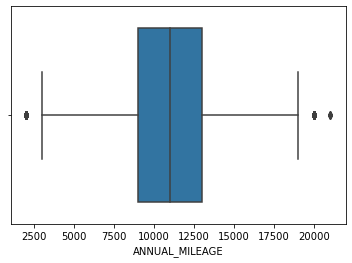

In [3]:
sns.boxplot(train['ANNUAL_MILEAGE'])

<AxesSubplot:xlabel='CREDIT_SCORE'>

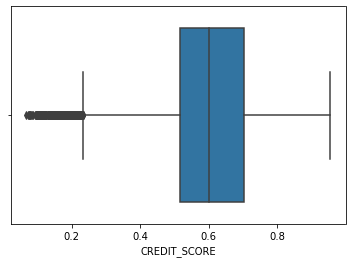

In [4]:
sns.boxplot(train['CREDIT_SCORE'])

In [5]:

Q1 = np.percentile(train['ANNUAL_MILEAGE'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(train['ANNUAL_MILEAGE'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(train['ANNUAL_MILEAGE'], 75, interpolation = 'midpoint') 
  
print('Q1 25 percentile of the given data is, ', Q1)
print('Q1 50 percentile of the given data is, ', Q2)
print('Q1 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range is', IQR)

Q1 25 percentile of the given data is,  9000.0
Q1 50 percentile of the given data is,  11000.0
Q1 75 percentile of the given data is,  13000.0
Interquartile range is 4000.0


In [6]:
from scipy import stats
IQR = stats.iqr(train['ANNUAL_MILEAGE'], interpolation = 'midpoint')
IQR

4000.0

In [7]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 3000.0
up_limit is 19000.0


In [8]:
outlier =[]
for x in train['ANNUAL_MILEAGE']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
# print(' outlier in the dataset is', outlier)

### Directly using Pandas

In [9]:
data = train[['CREDIT_SCORE','ANNUAL_MILEAGE']]

In [10]:
# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in data.columns:
    if i == data.columns[0]:
        removeOutliers(data, i)
    else:
        removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)


IQR value for column CREDIT_SCORE is: 0.1883407904737523
IQR value for column ANNUAL_MILEAGE is: 4000.0
Shape of data after outlier removal is:  (101989, 2)


<AxesSubplot:xlabel='CREDIT_SCORE'>

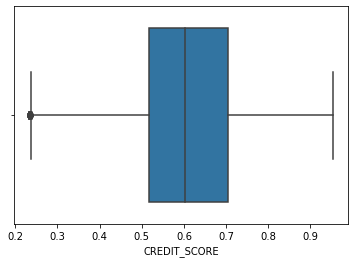

In [11]:
sns.boxplot(data['CREDIT_SCORE'])

<AxesSubplot:xlabel='ANNUAL_MILEAGE'>

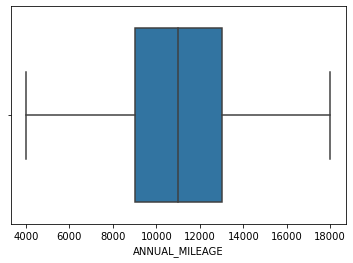

In [12]:
sns.boxplot(data['ANNUAL_MILEAGE'])